<a href="https://colab.research.google.com/github/PLEX-GR00T/Pose_Estimation/blob/main/Workout_Pose_2D_Dumbbell_High_Curls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [210]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [211]:
# Upload first your data before execute these code below
path_workout = "/content/drive/MyDrive/295A/HDC_0.csv"; # change this
path_other = "/content/drive/MyDrive/295A/Negative_sample_hurt.csv"; # change this
name_class = "DHC" # change this
# change resolution if you using video with different resolution
resolution = { 
    "width": 640,
    "height": 360
}

In [212]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [213]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,397.410494,84.442782,404.696262,81.500268,392.100783,79.911113,412.437813,94.508457,379.500629,91.753912,...,371.062636,231.648827,418.664070,317.627525,354.589607,320.459270,429.137813,389.271259,356.243051,405.352020
1,406.184344,89.391246,411.376375,82.277538,395.310689,81.072503,411.588017,87.198876,380.021145,87.890967,...,376.165900,237.239941,425.447531,318.818779,367.265695,321.682769,427.564846,390.663097,356.725856,396.443136
2,405.850164,87.958255,411.099415,81.720123,395.859369,79.980713,408.281564,90.134127,378.839753,88.391427,...,375.338838,238.078718,426.490547,316.420681,366.762603,320.709696,427.485693,389.785432,355.288814,398.465166
3,405.985439,88.173896,409.896066,81.497797,396.644431,79.787564,407.999856,89.155359,378.709027,86.916603,...,375.081648,237.386992,425.529468,317.162462,365.708078,322.725796,425.855418,387.374998,354.676651,397.167539
4,406.482183,88.936207,410.318383,81.202743,396.343162,80.062959,407.322454,89.146294,379.163519,87.157653,...,375.709090,236.528358,425.213743,318.368859,366.217597,322.492009,428.525681,390.149408,355.616322,397.961579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,406.185324,88.730989,410.655802,81.306090,396.762769,79.780338,407.845921,88.042002,378.824204,86.921365,...,376.724641,236.223293,425.687421,318.501408,367.395901,321.227094,427.043754,390.013106,356.015531,395.873729
2343,405.746326,88.611165,410.569306,81.421441,396.592580,79.714115,408.052254,87.956895,378.750321,86.772161,...,376.735753,236.268021,425.674221,318.979796,367.411489,321.237302,427.170925,390.298782,355.673557,395.465301
2344,406.049980,88.630246,410.748710,81.236144,396.688936,79.603187,407.919744,88.150595,378.728922,86.988322,...,376.747283,236.084871,425.638990,318.594705,367.399924,321.232491,427.070381,390.068449,356.016527,395.807887
2345,405.394232,88.619282,410.504089,81.505153,396.316891,79.669183,408.281416,88.141070,378.675828,86.804448,...,376.654767,236.467621,425.636646,318.943613,367.416860,321.227755,427.194306,390.331702,355.719676,395.540767


In [214]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,532.308365,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,612.211568,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,659.413646,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,611.818734,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,535.062218,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [215]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,397.410494,84.442782,404.696262,81.500268,392.100783,79.911113,412.437813,94.508457,379.500629,91.753912,...,231.648827,418.664070,317.627525,354.589607,320.459270,429.137813,389.271259,356.243051,405.352020,DHC
1,406.184344,89.391246,411.376375,82.277538,395.310689,81.072503,411.588017,87.198876,380.021145,87.890967,...,237.239941,425.447531,318.818779,367.265695,321.682769,427.564846,390.663097,356.725856,396.443136,DHC
2,405.850164,87.958255,411.099415,81.720123,395.859369,79.980713,408.281564,90.134127,378.839753,88.391427,...,238.078718,426.490547,316.420681,366.762603,320.709696,427.485693,389.785432,355.288814,398.465166,DHC
3,405.985439,88.173896,409.896066,81.497797,396.644431,79.787564,407.999856,89.155359,378.709027,86.916603,...,237.386992,425.529468,317.162462,365.708078,322.725796,425.855418,387.374998,354.676651,397.167539,DHC
4,406.482183,88.936207,410.318383,81.202743,396.343162,80.062959,407.322454,89.146294,379.163519,87.157653,...,236.528358,425.213743,318.368859,366.217597,322.492009,428.525681,390.149408,355.616322,397.961579,DHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,406.185324,88.730989,410.655802,81.306090,396.762769,79.780338,407.845921,88.042002,378.824204,86.921365,...,236.223293,425.687421,318.501408,367.395901,321.227094,427.043754,390.013106,356.015531,395.873729,DHC
2343,405.746326,88.611165,410.569306,81.421441,396.592580,79.714115,408.052254,87.956895,378.750321,86.772161,...,236.268021,425.674221,318.979796,367.411489,321.237302,427.170925,390.298782,355.673557,395.465301,DHC
2344,406.049980,88.630246,410.748710,81.236144,396.688936,79.603187,407.919744,88.150595,378.728922,86.988322,...,236.084871,425.638990,318.594705,367.399924,321.232491,427.070381,390.068449,356.016527,395.807887,DHC
2345,405.394232,88.619282,410.504089,81.505153,396.316891,79.669183,408.281416,88.141070,378.675828,86.804448,...,236.467621,425.636646,318.943613,367.416860,321.227755,427.194306,390.331702,355.719676,395.540767,DHC


In [216]:
df_workout = df_workout[:1415]
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,397.410494,84.442782,404.696262,81.500268,392.100783,79.911113,412.437813,94.508457,379.500629,91.753912,...,231.648827,418.664070,317.627525,354.589607,320.459270,429.137813,389.271259,356.243051,405.352020,DHC
1,406.184344,89.391246,411.376375,82.277538,395.310689,81.072503,411.588017,87.198876,380.021145,87.890967,...,237.239941,425.447531,318.818779,367.265695,321.682769,427.564846,390.663097,356.725856,396.443136,DHC
2,405.850164,87.958255,411.099415,81.720123,395.859369,79.980713,408.281564,90.134127,378.839753,88.391427,...,238.078718,426.490547,316.420681,366.762603,320.709696,427.485693,389.785432,355.288814,398.465166,DHC
3,405.985439,88.173896,409.896066,81.497797,396.644431,79.787564,407.999856,89.155359,378.709027,86.916603,...,237.386992,425.529468,317.162462,365.708078,322.725796,425.855418,387.374998,354.676651,397.167539,DHC
4,406.482183,88.936207,410.318383,81.202743,396.343162,80.062959,407.322454,89.146294,379.163519,87.157653,...,236.528358,425.213743,318.368859,366.217597,322.492009,428.525681,390.149408,355.616322,397.961579,DHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,405.433628,89.060606,410.391952,81.915800,396.420832,80.041662,407.956580,88.932395,378.950826,87.325056,...,235.744303,425.703563,318.295570,367.923513,320.380401,426.447162,390.457212,357.177304,396.425830,DHC
1411,406.362141,88.847097,410.775066,81.436891,396.876109,79.880659,408.117278,87.962819,379.072264,86.751797,...,235.676960,425.550461,318.652152,367.493029,321.012728,426.423485,389.806477,356.951934,397.071352,DHC
1412,406.497267,88.970554,410.867225,81.413571,397.038808,79.901687,408.032442,88.156180,379.187197,86.900661,...,235.479401,425.351810,318.836295,367.399110,320.639574,426.399372,389.941679,356.740535,396.932832,DHC
1413,406.488013,88.880623,410.807902,81.408319,397.024732,79.816080,408.083163,88.291114,379.065659,86.840217,...,235.278008,425.281400,318.827850,367.533792,320.290075,426.455505,389.932158,356.721292,396.896563,DHC


In [217]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904,other
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337,other
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506,other
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591,other
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [218]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,397.410494,84.442782,404.696262,81.500268,392.100783,79.911113,412.437813,94.508457,379.500629,91.753912,...,231.648827,418.664070,317.627525,354.589607,320.459270,429.137813,389.271259,356.243051,405.352020,DHC
1,406.184344,89.391246,411.376375,82.277538,395.310689,81.072503,411.588017,87.198876,380.021145,87.890967,...,237.239941,425.447531,318.818779,367.265695,321.682769,427.564846,390.663097,356.725856,396.443136,DHC
2,405.850164,87.958255,411.099415,81.720123,395.859369,79.980713,408.281564,90.134127,378.839753,88.391427,...,238.078718,426.490547,316.420681,366.762603,320.709696,427.485693,389.785432,355.288814,398.465166,DHC
3,405.985439,88.173896,409.896066,81.497797,396.644431,79.787564,407.999856,89.155359,378.709027,86.916603,...,237.386992,425.529468,317.162462,365.708078,322.725796,425.855418,387.374998,354.676651,397.167539,DHC
4,406.482183,88.936207,410.318383,81.202743,396.343162,80.062959,407.322454,89.146294,379.163519,87.157653,...,236.528358,425.213743,318.368859,366.217597,322.492009,428.525681,390.149408,355.616322,397.961579,DHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
2826,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
2827,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
2828,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [219]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [220]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,397.410494,84.442782,404.696262,81.500268,392.100783,79.911113,412.437813,94.508457,379.500629,91.753912,...,371.062636,231.648827,418.664070,317.627525,354.589607,320.459270,429.137813,389.271259,356.243051,405.352020
1,406.184344,89.391246,411.376375,82.277538,395.310689,81.072503,411.588017,87.198876,380.021145,87.890967,...,376.165900,237.239941,425.447531,318.818779,367.265695,321.682769,427.564846,390.663097,356.725856,396.443136
2,405.850164,87.958255,411.099415,81.720123,395.859369,79.980713,408.281564,90.134127,378.839753,88.391427,...,375.338838,238.078718,426.490547,316.420681,366.762603,320.709696,427.485693,389.785432,355.288814,398.465166
3,405.985439,88.173896,409.896066,81.497797,396.644431,79.787564,407.999856,89.155359,378.709027,86.916603,...,375.081648,237.386992,425.529468,317.162462,365.708078,322.725796,425.855418,387.374998,354.676651,397.167539
4,406.482183,88.936207,410.318383,81.202743,396.343162,80.062959,407.322454,89.146294,379.163519,87.157653,...,375.709090,236.528358,425.213743,318.368859,366.217597,322.492009,428.525681,390.149408,355.616322,397.961579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
2826,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
2827,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
2828,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


In [221]:
y

0         DHC
1         DHC
2         DHC
3         DHC
4         DHC
        ...  
2825    other
2826    other
2827    other
2828    other
2829    other
Name: class, Length: 2830, dtype: object

In [222]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [223]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [224]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.620954,0.234563,0.632338,0.226390,0.612657,0.221975,0.644434,0.262523,0.592970,0.254872,...,0.579785,0.643469,0.654163,0.882299,0.554046,0.890165,0.670528,1.081309,0.556630,1.125978
1,0.634663,0.248309,0.642776,0.228549,0.617673,0.225201,0.643106,0.242219,0.593783,0.244142,...,0.587759,0.659000,0.664762,0.885608,0.573853,0.893563,0.668070,1.085175,0.557384,1.101231
2,0.634141,0.244328,0.642343,0.227000,0.618530,0.222169,0.637940,0.250373,0.591937,0.245532,...,0.586467,0.661330,0.666391,0.878946,0.573067,0.890860,0.667946,1.082737,0.555139,1.106848
3,0.634352,0.244927,0.640463,0.226383,0.619757,0.221632,0.637500,0.247654,0.591733,0.241435,...,0.586065,0.659408,0.664890,0.881007,0.571419,0.896461,0.665399,1.076042,0.554182,1.103243
4,0.635128,0.247045,0.641122,0.225563,0.619286,0.222397,0.636441,0.247629,0.592443,0.242105,...,0.587045,0.657023,0.664396,0.884358,0.572215,0.895811,0.669571,1.083748,0.555651,1.105449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,0.510612,1.083607,0.460329,1.147046,0.467996,1.178444,0.471628,1.137148,0.490829,1.187755,...,0.909140,1.093004,1.072915,0.596789,1.151071,1.060423,1.227274,0.315581,1.016659,1.341157
2826,0.478093,1.062686,0.452144,1.057624,0.444571,1.074844,0.441043,1.054116,0.457429,1.175915,...,0.906516,1.054649,1.068139,0.591206,1.173140,1.077118,1.232883,0.311352,1.011956,1.346956
2827,0.490320,1.168533,0.461769,1.154762,0.478264,1.204318,0.474831,1.121172,0.514817,1.224627,...,0.909052,1.128191,1.076949,0.626741,1.143083,1.125285,1.234721,0.295563,1.380035,1.099508
2828,0.491787,1.142435,0.469028,1.130297,0.483343,1.171735,0.480268,1.087700,0.506639,1.183456,...,0.893454,1.099659,1.070716,0.577049,1.151173,1.088440,1.243809,0.295324,1.369178,1.101079


### One Hot Encoding

In [225]:
y = pd.get_dummies(y).values
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

### Split Dataset

In [226]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [227]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 2264
The number of test data X is: 566
The number of train data y is : 2264
The number of test daya y is : 566
The total dataset is : 2830


## Modelling

In [228]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [229]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                2240      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_27 (Dense)            (None, 2)                

In [230]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [231]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [232]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=125)

Epoch 1/125
36/36 [==============================] - 1s 8ms/step - loss: 0.6905 - accuracy: 0.5389 - val_loss: 0.6203 - val_accuracy: 0.9912
Epoch 2/125
36/36 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.5888 - val_loss: 0.5196 - val_accuracy: 0.9876
Epoch 3/125
36/36 [==============================] - 0s 4ms/step - loss: 0.5390 - accuracy: 0.7354 - val_loss: 0.4021 - val_accuracy: 0.9806
Epoch 4/125
36/36 [==============================] - 0s 3ms/step - loss: 0.4479 - accuracy: 0.8962 - val_loss: 0.3248 - val_accuracy: 0.9823
Epoch 5/125
36/36 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.9249 - val_loss: 0.2586 - val_accuracy: 0.9823
Epoch 6/125
36/36 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.9373 - val_loss: 0.1753 - val_accuracy: 0.9859
Epoch 7/125
36/36 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9501 - val_loss: 0.1091 - val_accuracy: 0.9894
Epoch 8/125
3

## Visualization Acc & Loss

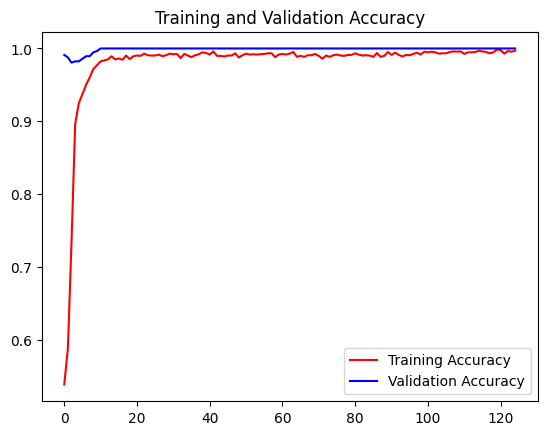

<Figure size 640x480 with 0 Axes>

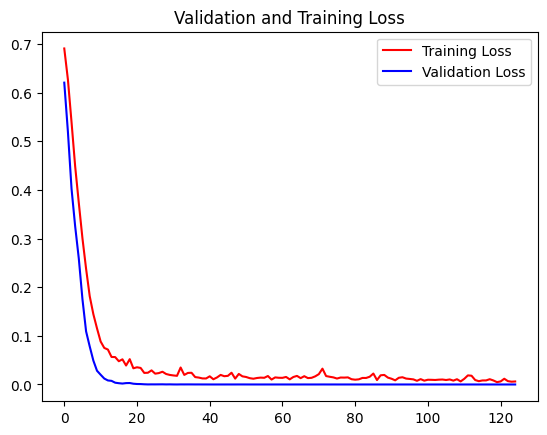

<Figure size 640x480 with 0 Axes>

In [233]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [234]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 9.8457540786967e-08
Test accuracy: 1.0


## Test Prediction

In [235]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
1334,0.633963,0.24719,0.642176,0.226076,0.619818,0.220735,0.638139,0.246919,0.592476,0.241957,...,0.588995,0.654959,0.664605,0.885684,0.574185,0.891565,0.666187,1.08161,0.557245,1.100759


In [236]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : DHC


In [237]:
df_data['class'].unique()

array(['DHC', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [238]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 72ms/step


In [239]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
other


## Export Model

In [240]:
# Download this file for backup
model.save("model.h5")

In [241]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2023-04-07 01:25:35.922960: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-07 01:25:35.923601: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-07 01:25:35.923677: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [243]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

updating: content/tfjs_float_model_workout/ (stored 0%)
updating: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 8%)
updating: content/tfjs_float_model_workout/model.json (deflated 78%)


Don't forget to download tfjs model (check relatable folder)